# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

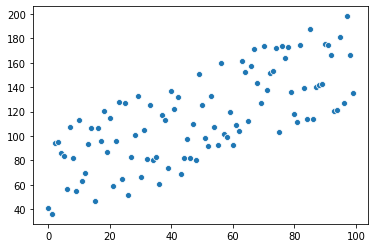

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1172.493224
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 1170.617294
[1.92855402 2.33954908]
Iteration 2 | Cost: 1168.752183
[1.92690662 1.53650916]
Iteration 3 | Cost: 1166.897822
[1.9494285  2.33668202]
Iteration 4 | Cost: 1165.054144
[1.94785468 1.53873757]
Iteration 5 | Cost: 1163.221082
[1.97029676 2.33383125]
Iteration 6 | Cost: 1161.398567
[1.96879606 1.54094993]
Iteration 7 | Cost: 1159.586534
[1.99115882 2.33099667]
Iteration 8 | Cost: 1157.784917
[1.98973074 1.54314635]
Iteration 9 | Cost: 1155.993649
[2.01201467 2.32817817]
Iteration 10 | Cost: 1154.212666
[2.01065874 1.54532693]
Iteration 11 | Cost: 1152.441902
[2.03286432 2.32537567]
Iteration 12 | Cost: 1150.681293
[2.03158005 1.54749177]
Iteration 13 | Cost: 1148.930775
[2.05370776 2.32258904]
Iteration 14 | Cost: 1147.190284
[2.05249469 1.54964096]
Iteration 15 | Cost: 1145.459756
[2.074545  2.3198182]
Iteration 16 | Cost: 1143.739129
[2.07340265 1.55177462]
Iteration 17 | Cost: 1142.028341
[2.0953760

[4.85605607 1.73194093]
Iteration 289 | Cost: 897.941089
[4.87091532 2.05380437]
Iteration 290 | Cost: 897.507133
[4.87607872 1.73266273]
Iteration 291 | Cost: 897.074938
[4.89090407 2.05248259]
Iteration 292 | Cost: 896.644492
[4.89609511 1.73337814]
Iteration 293 | Cost: 896.215784
[4.91088675 2.05116737]
Iteration 294 | Cost: 895.788805
[4.91610522 1.73408718]
Iteration 295 | Cost: 895.363543
[4.93086336 2.04985868]
Iteration 296 | Cost: 894.939987
[4.93610907 1.7347899 ]
Iteration 297 | Cost: 894.518128
[4.9508339  2.04855647]
Iteration 298 | Cost: 894.097954
[4.95610666 1.73548634]
Iteration 299 | Cost: 893.679455
[4.97079837 2.04726072]
Iteration 300 | Cost: 893.262621
[4.97609799 1.73617654]
Iteration 301 | Cost: 892.847442
[4.99075677 2.04597136]
Iteration 302 | Cost: 892.433908
[4.99608306 1.73686055]
Iteration 303 | Cost: 892.022007
[5.0107091  2.04468837]
Iteration 304 | Cost: 891.611731
[5.01606187 1.73753839]
Iteration 305 | Cost: 891.203070
[5.03065537 2.0434117 ]
Iterati

Iteration 549 | Cost: 822.476820
[7.41901884 1.92487568]
Iteration 550 | Cost: 822.273459
[7.42651324 1.78443543]
Iteration 551 | Cost: 822.070472
[7.43822977 1.92414005]
Iteration 552 | Cost: 821.867856
[7.44573463 1.78459022]
Iteration 553 | Cost: 821.665610
[7.45743481 1.92340733]
Iteration 554 | Cost: 821.463731
[7.46495005 1.78474228]
Iteration 555 | Cost: 821.262216
[7.47663397 1.92267752]
Iteration 556 | Cost: 821.061065
[7.4841595  1.78489162]
Iteration 557 | Cost: 820.860275
[7.49582725 1.9219506 ]
Iteration 558 | Cost: 820.659844
[7.50336298 1.78503826]
Iteration 559 | Cost: 820.459771
[7.51501465 1.92122654]
Iteration 560 | Cost: 820.260052
[7.52256051 1.78518223]
Iteration 561 | Cost: 820.060686
[7.53419617 1.92050532]
Iteration 562 | Cost: 819.861672
[7.54175207 1.78532354]
Iteration 563 | Cost: 819.663007
[7.55337181 1.91978694]
Iteration 564 | Cost: 819.464689
[7.56093767 1.7854622 ]
Iteration 565 | Cost: 819.266716
[7.57254157 1.91907137]
Iteration 566 | Cost: 819.06908

Iteration 904 | Cost: 764.129300
[10.73753922  1.78186907]
Iteration 905 | Cost: 763.987786
[10.74731989  1.82704845]
Iteration 906 | Cost: 763.846349
[10.75573489  1.7817388 ]
Iteration 907 | Cost: 763.704987
[10.76550841  1.82663063]
Iteration 908 | Cost: 763.563702
[10.77392493  1.78160771]
Iteration 909 | Cost: 763.422491
[10.78369134  1.8262138 ]
Iteration 910 | Cost: 763.281356
[10.79210934  1.78147578]
Iteration 911 | Cost: 763.140295
[10.80186867  1.82579797]
Iteration 912 | Cost: 762.999310
[10.81028813  1.78134305]
Iteration 913 | Cost: 762.858398
[10.8200404   1.82538311]
Iteration 914 | Cost: 762.717562
[10.82846131  1.7812095 ]
Iteration 915 | Cost: 762.576799
[10.83820654  1.82496924]
Iteration 916 | Cost: 762.436110
[10.84662886  1.78107514]
Iteration 917 | Cost: 762.295494
[10.85636709  1.82455634]
Iteration 918 | Cost: 762.154952
[10.86479079  1.78093998]
Iteration 919 | Cost: 762.014484
[10.87452205  1.8241444 ]
Iteration 920 | Cost: 761.874088
[10.88294711  1.7808040

Iteration 1314 | Cost: 710.904408
[14.35250969  1.74391282]
Iteration 1315 | Cost: 710.784046
[14.36123478  1.7560707 ]
Iteration 1316 | Cost: 710.663724
[14.36958867  1.74369438]
Iteration 1317 | Cost: 710.543441
[14.37830996  1.75577433]
Iteration 1318 | Cost: 710.423198
[14.38666238  1.74347578]
Iteration 1319 | Cost: 710.302994
[14.39537986  1.75547828]
Iteration 1320 | Cost: 710.182829
[14.40373082  1.74325701]
Iteration 1321 | Cost: 710.062704
[14.41244451  1.75518257]
Iteration 1322 | Cost: 709.942618
[14.42079399  1.74303808]
Iteration 1323 | Cost: 709.822572
[14.42950389  1.75488717]
Iteration 1324 | Cost: 709.702564
[14.43785189  1.74281898]
Iteration 1325 | Cost: 709.582596
[14.44655802  1.7545921 ]
Iteration 1326 | Cost: 709.462668
[14.45490452  1.74259972]
Iteration 1327 | Cost: 709.342778
[14.46360688  1.75429735]
Iteration 1328 | Cost: 709.222928
[14.4719519  1.7423803]
Iteration 1329 | Cost: 709.103117
[14.48065049  1.75400291]
Iteration 1330 | Cost: 708.983345
[14.4889

Iteration 1722 | Cost: 664.848599
[17.72971093  1.69747147]
Iteration 1723 | Cost: 664.742793
[17.73778038  1.70070312]
Iteration 1724 | Cost: 664.637019
[17.74574767  1.69724035]
Iteration 1725 | Cost: 664.531278
[17.75381433  1.70045076]
Iteration 1726 | Cost: 664.425570
[17.76177947  1.69700924]
Iteration 1727 | Cost: 664.319894
[17.76984334  1.70019854]
Iteration 1728 | Cost: 664.214251
[17.77780632  1.69677813]
Iteration 1729 | Cost: 664.108642
[17.7858674   1.69994646]
Iteration 1730 | Cost: 664.003064
[17.79382822  1.69654703]
Iteration 1731 | Cost: 663.897520
[17.80188651  1.69969453]
Iteration 1732 | Cost: 663.792008
[17.80984518  1.69631594]
Iteration 1733 | Cost: 663.686529
[17.81790069  1.69944273]
Iteration 1734 | Cost: 663.581083
[17.8258572   1.69608486]
Iteration 1735 | Cost: 663.475669
[17.83390993  1.69919108]
Iteration 1736 | Cost: 663.370289
[17.84186428  1.69585379]
Iteration 1737 | Cost: 663.264940
[17.84991423  1.69893956]
Iteration 1738 | Cost: 663.159625
[17.85

Iteration 1978 | Cost: 638.803693
[19.74271362  1.66805829]
Iteration 1979 | Cost: 638.705943
[19.75044439  1.66942614]
Iteration 1980 | Cost: 638.608224
[19.75812929  1.66783059]
Iteration 1981 | Cost: 638.510534
[19.76585754  1.66918906]
Iteration 1982 | Cost: 638.412875
[19.7735402   1.66760294]
Iteration 1983 | Cost: 638.315246
[19.78126593  1.66895209]
Iteration 1984 | Cost: 638.217648
[19.78894636  1.66737532]
Iteration 1985 | Cost: 638.120079
[19.79666957  1.66871521]
Iteration 1986 | Cost: 638.022541
[19.80434777  1.66714775]
Iteration 1987 | Cost: 637.925032
[19.81206846  1.66847843]
Iteration 1988 | Cost: 637.827554
[19.81974442  1.66692022]
Iteration 1989 | Cost: 637.730106
[19.82746261  1.66824176]
Iteration 1990 | Cost: 637.632688
[19.83513633  1.66669274]
Iteration 1991 | Cost: 637.535300
[19.842852    1.66800518]
Iteration 1992 | Cost: 637.437942
[19.85052348  1.66646529]
Iteration 1993 | Cost: 637.340614
[19.85823664  1.66776871]
Iteration 1994 | Cost: 637.243316
[19.86

Iteration 2241 | Cost: 614.107851
[21.72961459  1.6391679 ]
Iteration 2242 | Cost: 614.017724
[21.73700681  1.63841383]
Iteration 2243 | Cost: 613.927625
[21.74441722  1.63894269]
Iteration 2244 | Cost: 613.837554
[21.75180722  1.63819273]
Iteration 2245 | Cost: 613.747510
[21.75921529  1.63871755]
Iteration 2246 | Cost: 613.657495
[21.76660307  1.63797168]
Iteration 2247 | Cost: 613.567507
[21.7740088  1.6384925]
Iteration 2248 | Cost: 613.477547
[21.78139435  1.63775069]
Iteration 2249 | Cost: 613.387615
[21.78879774  1.63826753]
Iteration 2250 | Cost: 613.297710
[21.79618107  1.63752975]
Iteration 2251 | Cost: 613.207833
[21.80358212  1.63804264]
Iteration 2252 | Cost: 613.117984
[21.81096323  1.63730887]
Iteration 2253 | Cost: 613.028163
[21.81836194  1.63781784]
Iteration 2254 | Cost: 612.938369
[21.82574083  1.63708805]
Iteration 2255 | Cost: 612.848604
[21.8331372   1.63759311]
Iteration 2256 | Cost: 612.758865
[21.84051387  1.63686728]
Iteration 2257 | Cost: 612.669155
[21.8479

Iteration 2618 | Cost: 582.027021
[24.44073873  1.59787478]
Iteration 2619 | Cost: 581.946792
[24.44772534  1.59796298]
Iteration 2620 | Cost: 581.866587
[24.45470505  1.59766483]
Iteration 2621 | Cost: 581.786407
[24.46168949  1.59775184]
Iteration 2622 | Cost: 581.706252
[24.46866706  1.59745495]
Iteration 2623 | Cost: 581.626122
[24.47564933  1.59754076]
Iteration 2624 | Cost: 581.546017
[24.48262477  1.59724512]
Iteration 2625 | Cost: 581.465936
[24.48960486  1.59732975]
Iteration 2626 | Cost: 581.385880
[24.49657817  1.59703535]
Iteration 2627 | Cost: 581.305848
[24.50355609  1.59711882]
Iteration 2628 | Cost: 581.225841
[24.51052726  1.59682565]
Iteration 2629 | Cost: 581.145859
[24.51750302  1.59690795]
Iteration 2630 | Cost: 581.065902
[24.52447206  1.59661601]
Iteration 2631 | Cost: 580.985969
[24.53144564  1.59669715]
Iteration 2632 | Cost: 580.906061
[24.53841255  1.59640642]
Iteration 2633 | Cost: 580.826178
[24.54538396  1.59648642]
Iteration 2634 | Cost: 580.746319
[24.55

[26.64136577  1.56482852]
Iteration 2942 | Cost: 557.285984
[26.64800896  1.56465915]
Iteration 2943 | Cost: 557.213387
[26.65465321  1.56462797]
Iteration 2944 | Cost: 557.140813
[26.66129436  1.56445907]
Iteration 2945 | Cost: 557.068261
[26.66793655  1.56442749]
Iteration 2946 | Cost: 556.995731
[26.67457566  1.56425905]
Iteration 2947 | Cost: 556.923224
[26.6812158   1.56422706]
Iteration 2948 | Cost: 556.850739
[26.68785286  1.56405909]
Iteration 2949 | Cost: 556.778276
[26.69449094  1.5640267 ]
Iteration 2950 | Cost: 556.705836
[26.70112597  1.5638592 ]
Iteration 2951 | Cost: 556.633418
[26.707762    1.56382641]
Iteration 2952 | Cost: 556.561023
[26.71439498  1.56365936]
Iteration 2953 | Cost: 556.488649
[26.72102896  1.56362618]
Iteration 2954 | Cost: 556.416299
[26.7276599   1.56345958]
Iteration 2955 | Cost: 556.343970
[26.73429182  1.56342601]
Iteration 2956 | Cost: 556.271664
[26.74092072  1.56325987]
Iteration 2957 | Cost: 556.199380
[26.7475506  1.5632259]
Iteration 2958 |

Iteration 3235 | Cost: 536.945107
[28.55128166  1.53601253]
Iteration 3236 | Cost: 536.878785
[28.55763087  1.53588965]
Iteration 3237 | Cost: 536.812483
[28.56397992  1.53582099]
Iteration 3238 | Cost: 536.746202
[28.57032717  1.53569832]
Iteration 3239 | Cost: 536.679942
[28.57667426  1.53562952]
Iteration 3240 | Cost: 536.613702
[28.58301955  1.53550705]
Iteration 3241 | Cost: 536.547482
[28.58936468  1.53543811]
Iteration 3242 | Cost: 536.481283
[28.59570802  1.53531584]
Iteration 3243 | Cost: 536.415104
[28.60205118  1.53524676]
Iteration 3244 | Cost: 536.348946
[28.60839257  1.53512468]
Iteration 3245 | Cost: 536.282808
[28.61473378  1.53505546]
Iteration 3246 | Cost: 536.216690
[28.62107321  1.53493359]
Iteration 3247 | Cost: 536.150593
[28.62741246  1.53486423]
Iteration 3248 | Cost: 536.084516
[28.63374994  1.53474255]
Iteration 3249 | Cost: 536.018460
[28.64008722  1.53467305]
Iteration 3250 | Cost: 535.952424
[28.64642275  1.53455157]
Iteration 3251 | Cost: 535.886408
[28.65

[30.99065452  1.49922548]
Iteration 3632 | Cost: 512.160182
[30.99662773  1.49912773]
Iteration 3633 | Cost: 512.101506
[31.00260025  1.49904535]
Iteration 3634 | Cost: 512.042848
[31.00857162  1.49894768]
Iteration 3635 | Cost: 511.984208
[31.0145423   1.49886528]
Iteration 3636 | Cost: 511.925587
[31.02051183  1.49876768]
Iteration 3637 | Cost: 511.866983
[31.02648067  1.49868527]
Iteration 3638 | Cost: 511.808398
[31.03244836  1.49858775]
Iteration 3639 | Cost: 511.749830
[31.03841536  1.49850531]
Iteration 3640 | Cost: 511.691281
[31.0443812   1.49840786]
Iteration 3641 | Cost: 511.632749
[31.05034636  1.49832541]
Iteration 3642 | Cost: 511.574236
[31.05631037  1.49822804]
Iteration 3643 | Cost: 511.515741
[31.06227368  1.49814556]
Iteration 3644 | Cost: 511.457264
[31.06823585  1.49804827]
Iteration 3645 | Cost: 511.398804
[31.07419732  1.49796577]
Iteration 3646 | Cost: 511.340363
[31.08015765  1.49786855]
Iteration 3647 | Cost: 511.281940
[31.08611728  1.49778604]
Iteration 3648

Iteration 3912 | Cost: 496.418138
[32.63342549  1.47445274]
Iteration 3913 | Cost: 496.364318
[32.63914546  1.47436965]
Iteration 3914 | Cost: 496.310515
[32.64486445  1.47428029]
Iteration 3915 | Cost: 496.256728
[32.65058265  1.47419721]
Iteration 3916 | Cost: 496.202958
[32.65629988  1.4741079 ]
Iteration 3917 | Cost: 496.149205
[32.66201632  1.47402482]
Iteration 3918 | Cost: 496.095468
[32.66773178  1.47393555]
Iteration 3919 | Cost: 496.041748
[32.67344646  1.47385248]
Iteration 3920 | Cost: 495.988044
[32.67916016  1.47376326]
Iteration 3921 | Cost: 495.934357
[32.68487307  1.4736802 ]
Iteration 3922 | Cost: 495.880687
[32.69058501  1.47359102]
Iteration 3923 | Cost: 495.827033
[32.69629616  1.47350797]
Iteration 3924 | Cost: 495.773395
[32.70200633  1.47341884]
Iteration 3925 | Cost: 495.719774
[32.70771572  1.47333579]
Iteration 3926 | Cost: 495.666170
[32.71342414  1.47324671]
Iteration 3927 | Cost: 495.612582
[32.71913176  1.47316367]
Iteration 3928 | Cost: 495.559011
[32.72

Iteration 4137 | Cost: 484.717653
[33.89842567  1.45538326]
Iteration 4138 | Cost: 484.667442
[33.90395043  1.45529843]
Iteration 4139 | Cost: 484.617248
[33.90947439  1.45521668]
Iteration 4140 | Cost: 484.567068
[33.91499745  1.45513188]
Iteration 4141 | Cost: 484.516904
[33.9205197   1.45505015]
Iteration 4142 | Cost: 484.466756
[33.92604106  1.45496539]
Iteration 4143 | Cost: 484.416623
[33.93156161  1.45488367]
Iteration 4144 | Cost: 484.366506
[33.93708126  1.45479894]
Iteration 4145 | Cost: 484.316404
[33.94260011  1.45471724]
Iteration 4146 | Cost: 484.266317
[33.94811806  1.45463255]
Iteration 4147 | Cost: 484.216246
[33.9536352   1.45455087]
Iteration 4148 | Cost: 484.166191
[33.95915145  1.45446621]
Iteration 4149 | Cost: 484.116151
[33.96466689  1.45438454]
Iteration 4150 | Cost: 484.066126
[33.97018143  1.45429992]
Iteration 4151 | Cost: 484.016117
[33.97569517  1.45421827]
Iteration 4152 | Cost: 483.966123
[33.98120802  1.45413368]
Iteration 4153 | Cost: 483.916144
[33.98

Iteration 4507 | Cost: 467.158323
[35.88550436  1.42542445]
Iteration 4508 | Cost: 467.113530
[35.89072262  1.4253453 ]
Iteration 4509 | Cost: 467.068750
[35.89594009  1.42526712]
Iteration 4510 | Cost: 467.023984
[35.90115674  1.425188  ]
Iteration 4511 | Cost: 466.979232
[35.9063726   1.42510983]
Iteration 4512 | Cost: 466.934494
[35.91158764  1.42503074]
Iteration 4513 | Cost: 466.889770
[35.91680189  1.42495259]
Iteration 4514 | Cost: 466.845059
[35.92201533  1.42487352]
Iteration 4515 | Cost: 466.800362
[35.92722797  1.4247954 ]
Iteration 4516 | Cost: 466.755679
[35.93243979  1.42471636]
Iteration 4517 | Cost: 466.711010
[35.93765082  1.42463826]
Iteration 4518 | Cost: 466.666355
[35.94286104  1.42455925]
Iteration 4519 | Cost: 466.621713
[35.94807047  1.42448116]
Iteration 4520 | Cost: 466.577085
[35.95327908  1.42440218]
Iteration 4521 | Cost: 466.532471
[35.95848689  1.42432412]
Iteration 4522 | Cost: 466.487871
[35.9636939   1.42424516]
Iteration 4523 | Cost: 466.443284
[35.96

Iteration 4874 | Cost: 451.613312
[37.74754751  1.39735097]
Iteration 4875 | Cost: 451.573314
[37.75247855  1.39727677]
Iteration 4876 | Cost: 451.533329
[37.75740882  1.3972023 ]
Iteration 4877 | Cost: 451.493355
[37.76233834  1.39712812]
Iteration 4878 | Cost: 451.453394
[37.76726709  1.39705367]
Iteration 4879 | Cost: 451.413446
[37.77219508  1.39697952]
Iteration 4880 | Cost: 451.373509
[37.77712231  1.39690508]
Iteration 4881 | Cost: 451.333585
[37.78204879  1.39683096]
Iteration 4882 | Cost: 451.293674
[37.7869745   1.39675655]
Iteration 4883 | Cost: 451.253774
[37.79189945  1.39668244]
Iteration 4884 | Cost: 451.213887
[37.79682365  1.39660806]
Iteration 4885 | Cost: 451.174013
[37.80174708  1.39653397]
Iteration 4886 | Cost: 451.134150
[37.80666975  1.39645961]
Iteration 4887 | Cost: 451.094300
[37.81159167  1.39638555]
Iteration 4888 | Cost: 451.054462
[37.81651282  1.39631121]
Iteration 4889 | Cost: 451.014637
[37.82143322  1.39623717]
Iteration 4890 | Cost: 450.974823
[37.82

[39.39972742  1.37244186]
Iteration 5219 | Cost: 438.521053
[39.40440359  1.37237141]
Iteration 5220 | Cost: 438.485094
[39.40907905  1.37230087]
Iteration 5221 | Cost: 438.449145
[39.41375378  1.37223044]
Iteration 5222 | Cost: 438.413209
[39.41842779  1.37215992]
Iteration 5223 | Cost: 438.377283
[39.42310108  1.37208951]
Iteration 5224 | Cost: 438.341368
[39.42777365  1.37201902]
Iteration 5225 | Cost: 438.305464
[39.4324455   1.37194863]
Iteration 5226 | Cost: 438.269572
[39.43711663  1.37187816]
Iteration 5227 | Cost: 438.233690
[39.44178704  1.37180779]
Iteration 5228 | Cost: 438.197820
[39.44645672  1.37173734]
Iteration 5229 | Cost: 438.161960
[39.45112569  1.371667  ]
Iteration 5230 | Cost: 438.126112
[39.45579394  1.37159657]
Iteration 5231 | Cost: 438.090274
[39.46046147  1.37152625]
Iteration 5232 | Cost: 438.054448
[39.46512827  1.37145584]
Iteration 5233 | Cost: 438.018633
[39.46979436  1.37138554]
Iteration 5234 | Cost: 437.982829
[39.47445973  1.37131516]
Iteration 5235

Iteration 5538 | Cost: 427.594834
[40.8598816  1.3504278]
Iteration 5539 | Cost: 427.562246
[40.86433253  1.35036071]
Iteration 5540 | Cost: 427.529667
[40.86878278  1.3502936 ]
Iteration 5541 | Cost: 427.497099
[40.87323235  1.35022653]
Iteration 5542 | Cost: 427.464541
[40.87768123  1.35015944]
Iteration 5543 | Cost: 427.431992
[40.88212942  1.3500924 ]
Iteration 5544 | Cost: 427.399454
[40.88657692  1.35002533]
Iteration 5545 | Cost: 427.366926
[40.89102374  1.3499583 ]
Iteration 5546 | Cost: 427.334408
[40.89546988  1.34989125]
Iteration 5547 | Cost: 427.301899
[40.89991532  1.34982425]
Iteration 5548 | Cost: 427.269401
[40.90436009  1.34975722]
Iteration 5549 | Cost: 427.236913
[40.90880416  1.34969023]
Iteration 5550 | Cost: 427.204435
[40.91324755  1.34962323]
Iteration 5551 | Cost: 427.171967
[40.91769026  1.34955626]
Iteration 5552 | Cost: 427.139509
[40.92213228  1.34948927]
Iteration 5553 | Cost: 427.107061
[40.92657361  1.34942233]
Iteration 5554 | Cost: 427.074623
[40.9310

Iteration 5856 | Cost: 417.722325
[42.24122923  1.32960186]
Iteration 5857 | Cost: 417.692782
[42.24546708  1.32953797]
Iteration 5858 | Cost: 417.663248
[42.24970428  1.32947408]
Iteration 5859 | Cost: 417.633723
[42.25394083  1.32941022]
Iteration 5860 | Cost: 417.604208
[42.25817673  1.32934635]
Iteration 5861 | Cost: 417.574701
[42.26241197  1.3292825 ]
Iteration 5862 | Cost: 417.545204
[42.26664656  1.32921865]
Iteration 5863 | Cost: 417.515715
[42.27088049  1.32915483]
Iteration 5864 | Cost: 417.486236
[42.27511377  1.329091  ]
Iteration 5865 | Cost: 417.456766
[42.2793464   1.32902719]
Iteration 5866 | Cost: 417.427305
[42.28357838  1.32896338]
Iteration 5867 | Cost: 417.397853
[42.2878097   1.32889959]
Iteration 5868 | Cost: 417.368410
[42.29204037  1.3288358 ]
Iteration 5869 | Cost: 417.338976
[42.29627039  1.32877204]
Iteration 5870 | Cost: 417.309552
[42.30049975  1.32870826]
Iteration 5871 | Cost: 417.280136
[42.30472847  1.32864452]
Iteration 5872 | Cost: 417.250729
[42.30

Iteration 6242 | Cost: 406.969967
[43.82941221  1.30565755]
Iteration 6243 | Cost: 406.943741
[43.83340507  1.30559736]
Iteration 6244 | Cost: 406.917523
[43.83739733  1.30553717]
Iteration 6245 | Cost: 406.891313
[43.84138896  1.30547699]
Iteration 6246 | Cost: 406.865112
[43.84537998  1.30541682]
Iteration 6247 | Cost: 406.838918
[43.84937039  1.30535666]
Iteration 6248 | Cost: 406.812733
[43.85336018  1.3052965 ]
Iteration 6249 | Cost: 406.786555
[43.85734935  1.30523636]
Iteration 6250 | Cost: 406.760386
[43.86133791  1.30517623]
Iteration 6251 | Cost: 406.734224
[43.86532586  1.3051161 ]
Iteration 6252 | Cost: 406.708071
[43.86931318  1.30505599]
Iteration 6253 | Cost: 406.681926
[43.8732999   1.30499588]
Iteration 6254 | Cost: 406.655789
[43.87728599  1.30493578]
Iteration 6255 | Cost: 406.629660
[43.88127148  1.3048757 ]
Iteration 6256 | Cost: 406.603539
[43.88525635  1.30481562]
Iteration 6257 | Cost: 406.577426
[43.8892406   1.30475555]
Iteration 6258 | Cost: 406.551321
[43.89

Iteration 6633 | Cost: 397.308513
[45.34458788  1.28281395]
Iteration 6634 | Cost: 397.285267
[45.34834703  1.28275727]
Iteration 6635 | Cost: 397.262029
[45.35210559  1.28270061]
Iteration 6636 | Cost: 397.238798
[45.35586357  1.28264395]
Iteration 6637 | Cost: 397.215574
[45.35962098  1.2825873 ]
Iteration 6638 | Cost: 397.192357
[45.3633778   1.28253066]
Iteration 6639 | Cost: 397.169147
[45.36713404  1.28247403]
Iteration 6640 | Cost: 397.145945
[45.37088971  1.28241741]
Iteration 6641 | Cost: 397.122749
[45.3746448   1.28236079]
Iteration 6642 | Cost: 397.099561
[45.3783993   1.28230419]
Iteration 6643 | Cost: 397.076380
[45.38215323  1.28224759]
Iteration 6644 | Cost: 397.053206
[45.38590658  1.282191  ]
Iteration 6645 | Cost: 397.030039
[45.38965935  1.28213442]
Iteration 6646 | Cost: 397.006880
[45.39341154  1.28207785]
Iteration 6647 | Cost: 396.983727
[45.39716315  1.28202129]
Iteration 6648 | Cost: 396.960582
[45.40091418  1.28196474]
Iteration 6649 | Cost: 396.937444
[45.40

Iteration 7008 | Cost: 389.075562
[46.71437173  1.26216234]
Iteration 7009 | Cost: 389.054856
[46.71791957  1.26210885]
Iteration 7010 | Cost: 389.034157
[46.72146687  1.26205537]
Iteration 7011 | Cost: 389.013464
[46.72501362  1.2620019 ]
Iteration 7012 | Cost: 388.992777
[46.72855982  1.26194844]
Iteration 7013 | Cost: 388.972097
[46.73210548  1.26189498]
Iteration 7014 | Cost: 388.951423
[46.73565059  1.26184153]
Iteration 7015 | Cost: 388.930756
[46.73919515  1.26178809]
Iteration 7016 | Cost: 388.910095
[46.74273917  1.26173466]
Iteration 7017 | Cost: 388.889440
[46.74628264  1.26168124]
Iteration 7018 | Cost: 388.868792
[46.74982556  1.26162782]
Iteration 7019 | Cost: 388.848150
[46.75336793  1.26157441]
Iteration 7020 | Cost: 388.827514
[46.75690976  1.26152102]
Iteration 7021 | Cost: 388.806885
[46.76045105  1.26146763]
Iteration 7022 | Cost: 388.786262
[46.76399178  1.26141424]
Iteration 7023 | Cost: 388.765645
[46.76753197  1.26136087]
Iteration 7024 | Cost: 388.745035
[46.77

Iteration 7381 | Cost: 381.779036
[48.00046289  1.24277254]
Iteration 7382 | Cost: 381.760581
[48.00381235  1.24272204]
Iteration 7383 | Cost: 381.742132
[48.00716129  1.24267155]
Iteration 7384 | Cost: 381.723689
[48.01050972  1.24262106]
Iteration 7385 | Cost: 381.705251
[48.01385762  1.24257059]
Iteration 7386 | Cost: 381.686819
[48.01720501  1.24252012]
Iteration 7387 | Cost: 381.668392
[48.02055189  1.24246966]
Iteration 7388 | Cost: 381.649972
[48.02389825  1.24241921]
Iteration 7389 | Cost: 381.631557
[48.02724409  1.24236877]
Iteration 7390 | Cost: 381.613147
[48.03058941  1.24231833]
Iteration 7391 | Cost: 381.594744
[48.03393422  1.2422679 ]
Iteration 7392 | Cost: 381.576346
[48.03727852  1.24221748]
Iteration 7393 | Cost: 381.557953
[48.0406223   1.24216707]
Iteration 7394 | Cost: 381.539567
[48.04396556  1.24211667]
Iteration 7395 | Cost: 381.521186
[48.0473083   1.24206627]
Iteration 7396 | Cost: 381.502810
[48.05065053  1.24201588]
Iteration 7397 | Cost: 381.484441
[48.05

[48.73798284  1.23165329]
Iteration 7606 | Cost: 377.766928
[48.74121853  1.2316045 ]
Iteration 7607 | Cost: 377.749711
[48.74445372  1.23155573]
Iteration 7608 | Cost: 377.732499
[48.74768841  1.23150696]
Iteration 7609 | Cost: 377.715292
[48.75092261  1.2314582 ]
Iteration 7610 | Cost: 377.698091
[48.7541563   1.23140945]
Iteration 7611 | Cost: 377.680895
[48.7573895  1.2313607]
Iteration 7612 | Cost: 377.663705
[48.76062219  1.23131196]
Iteration 7613 | Cost: 377.646519
[48.76385439  1.23126323]
Iteration 7614 | Cost: 377.629339
[48.76708609  1.23121451]
Iteration 7615 | Cost: 377.612165
[48.77031729  1.23116579]
Iteration 7616 | Cost: 377.594995
[48.77354799  1.23111709]
Iteration 7617 | Cost: 377.577831
[48.7767782   1.23106839]
Iteration 7618 | Cost: 377.560672
[48.7800079   1.23101969]
Iteration 7619 | Cost: 377.543519
[48.78323711  1.23097101]
Iteration 7620 | Cost: 377.526370
[48.78646582  1.23092233]
Iteration 7621 | Cost: 377.509227
[48.78969403  1.23087366]
Iteration 7622 |

[49.84972385  1.21489208]
Iteration 7959 | Cost: 372.007657
[49.85278805  1.21484588]
Iteration 7960 | Cost: 371.992217
[49.85585178  1.21479969]
Iteration 7961 | Cost: 371.976781
[49.85891503  1.2147535 ]
Iteration 7962 | Cost: 371.961350
[49.86197781  1.21470733]
Iteration 7963 | Cost: 371.945924
[49.86504011  1.21466116]
Iteration 7964 | Cost: 371.930502
[49.86810195  1.214615  ]
Iteration 7965 | Cost: 371.915086
[49.87116331  1.21456884]
Iteration 7966 | Cost: 371.899674
[49.8742242   1.21452269]
Iteration 7967 | Cost: 371.884267
[49.87728461  1.21447655]
Iteration 7968 | Cost: 371.868864
[49.88034456  1.21443042]
Iteration 7969 | Cost: 371.853467
[49.88340403  1.21438429]
Iteration 7970 | Cost: 371.838074
[49.88646303  1.21433818]
Iteration 7971 | Cost: 371.822685
[49.88952156  1.21429206]
Iteration 7972 | Cost: 371.807302
[49.89257962  1.21424596]
Iteration 7973 | Cost: 371.791923
[49.89563721  1.21419986]
Iteration 7974 | Cost: 371.776549
[49.89869432  1.21415377]
Iteration 7975

Iteration 8238 | Cost: 367.879333
[50.68949747  1.20223119]
Iteration 8239 | Cost: 367.865166
[50.69243213  1.20218695]
Iteration 8240 | Cost: 367.851004
[50.69536633  1.20214271]
Iteration 8241 | Cost: 367.836845
[50.69830009  1.20209848]
Iteration 8242 | Cost: 367.822692
[50.70123338  1.20205426]
Iteration 8243 | Cost: 367.808542
[50.70416623  1.20201004]
Iteration 8244 | Cost: 367.794397
[50.70709862  1.20196583]
Iteration 8245 | Cost: 367.780256
[50.71003056  1.20192163]
Iteration 8246 | Cost: 367.766120
[50.71296205  1.20187743]
Iteration 8247 | Cost: 367.751988
[50.71589309  1.20183324]
Iteration 8248 | Cost: 367.737860
[50.71882367  1.20178906]
Iteration 8249 | Cost: 367.723737
[50.72175381  1.20174488]
Iteration 8250 | Cost: 367.709618
[50.72468349  1.20170071]
Iteration 8251 | Cost: 367.695503
[50.72761272  1.20165655]
Iteration 8252 | Cost: 367.681393
[50.73054149  1.20161239]
Iteration 8253 | Cost: 367.667287
[50.73346982  1.20156824]
Iteration 8254 | Cost: 367.653186
[50.73

Iteration 8629 | Cost: 362.660337
[51.80311291  1.18544172]
Iteration 8630 | Cost: 362.647780
[51.80587579  1.18540007]
Iteration 8631 | Cost: 362.635227
[51.80863823  1.18535842]
Iteration 8632 | Cost: 362.622677
[51.81140026  1.18531678]
Iteration 8633 | Cost: 362.610132
[51.81416185  1.18527514]
Iteration 8634 | Cost: 362.597591
[51.81692302  1.18523351]
Iteration 8635 | Cost: 362.585053
[51.81968376  1.18519189]
Iteration 8636 | Cost: 362.572519
[51.82244408  1.18515028]
Iteration 8637 | Cost: 362.559990
[51.82520397  1.18510867]
Iteration 8638 | Cost: 362.547464
[51.82796344  1.18506706]
Iteration 8639 | Cost: 362.534941
[51.83072248  1.18502547]
Iteration 8640 | Cost: 362.522423
[51.8334811   1.18498388]
Iteration 8641 | Cost: 362.509909
[51.83623928  1.18494229]
Iteration 8642 | Cost: 362.497398
[51.83899705  1.18490071]
Iteration 8643 | Cost: 362.484892
[51.84175439  1.18485914]
Iteration 8644 | Cost: 362.472389
[51.8445113   1.18481758]
Iteration 8645 | Cost: 362.459890
[51.84

Iteration 8954 | Cost: 358.776672
[52.67897607  1.17223674]
Iteration 8955 | Cost: 358.765313
[52.68160384  1.17219712]
Iteration 8956 | Cost: 358.753958
[52.6842312   1.17215751]
Iteration 8957 | Cost: 358.742606
[52.68685815  1.1721179 ]
Iteration 8958 | Cost: 358.731257
[52.6894847  1.1720783]
Iteration 8959 | Cost: 358.719912
[52.69211085  1.17203871]
Iteration 8960 | Cost: 358.708571
[52.69473659  1.17199912]
Iteration 8961 | Cost: 358.697233
[52.69736193  1.17195954]
Iteration 8962 | Cost: 358.685899
[52.69998686  1.17191997]
Iteration 8963 | Cost: 358.674568
[52.70261138  1.1718804 ]
Iteration 8964 | Cost: 358.663241
[52.7052355   1.17184083]
Iteration 8965 | Cost: 358.651917
[52.70785922  1.17180128]
Iteration 8966 | Cost: 358.640596
[52.71048253  1.17176173]
Iteration 8967 | Cost: 358.629280
[52.71310543  1.17172218]
Iteration 8968 | Cost: 358.617966
[52.71572794  1.17168264]
Iteration 8969 | Cost: 358.606656
[52.71835003  1.17164311]
Iteration 8970 | Cost: 358.595350
[52.7209

Iteration 9365 | Cost: 354.391377
[53.72554241  1.15645813]
Iteration 9366 | Cost: 354.381371
[53.72800873  1.15642095]
Iteration 9367 | Cost: 354.371368
[53.73047468  1.15638377]
Iteration 9368 | Cost: 354.361368
[53.73294025  1.1563466 ]
Iteration 9369 | Cost: 354.351371
[53.73540543  1.15630943]
Iteration 9370 | Cost: 354.341378
[53.73787024  1.15627227]
Iteration 9371 | Cost: 354.331387
[53.74033466  1.15623512]
Iteration 9372 | Cost: 354.321400
[53.74279871  1.15619797]
Iteration 9373 | Cost: 354.311415
[53.74526237  1.15616083]
Iteration 9374 | Cost: 354.301434
[53.74772566  1.15612369]
Iteration 9375 | Cost: 354.291455
[53.75018856  1.15608656]
Iteration 9376 | Cost: 354.281480
[53.75265109  1.15604943]
Iteration 9377 | Cost: 354.271508
[53.75511323  1.15601231]
Iteration 9378 | Cost: 354.261539
[53.757575    1.15597519]
Iteration 9379 | Cost: 354.251573
[53.76003638  1.15593808]
Iteration 9380 | Cost: 354.241610
[53.76249739  1.15590098]
Iteration 9381 | Cost: 354.231650
[53.76

Iteration 9760 | Cost: 350.669761
[54.67072636  1.14220803]
Iteration 9761 | Cost: 350.660903
[54.67304689  1.14217304]
Iteration 9762 | Cost: 350.652048
[54.67536705  1.14213806]
Iteration 9763 | Cost: 350.643195
[54.67768686  1.14210309]
Iteration 9764 | Cost: 350.634346
[54.68000632  1.14206812]
Iteration 9765 | Cost: 350.625498
[54.68232541  1.14203316]
Iteration 9766 | Cost: 350.616654
[54.68464415  1.1419982 ]
Iteration 9767 | Cost: 350.607813
[54.68696253  1.14196324]
Iteration 9768 | Cost: 350.598974
[54.68928055  1.1419283 ]
Iteration 9769 | Cost: 350.590138
[54.69159821  1.14189335]
Iteration 9770 | Cost: 350.581304
[54.69391552  1.14185842]
Iteration 9771 | Cost: 350.572473
[54.69623247  1.14182349]
Iteration 9772 | Cost: 350.563645
[54.69854906  1.14178856]
Iteration 9773 | Cost: 350.554820
[54.7008653   1.14175364]
Iteration 9774 | Cost: 350.545998
[54.70318117  1.14171872]
Iteration 9775 | Cost: 350.537178
[54.70549669  1.14168381]
Iteration 9776 | Cost: 350.528361
[54.70

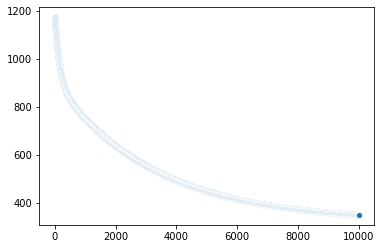

In [19]:
numEpochs= 10000
alpha = 0.000608
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

In [20]:
# 1 epoch may end up before the min loss, so use another one to keep the line until get to the min loss point

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise